In [1]:
# Evaluation of Supervised Learning Algorithms (Heart Disease Dataset)
# This notebook aims to provide a comparative analysis of different Supervised Learning Algorithms on Heart Disease dataset.
# The aim is to evaluate and compare the performance of these algorithms by means of performance metrics.
# The dataset used in this notebook is the Heart Disease dataset taken from Kaggle.
# Link of the dataset: "https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data".

In [2]:
# First, Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [3]:
# Loading and Preprocessing the dataset
# Preprocessing involves steps such as handling missing values, encoding the categorical values using Label Encode, and 
# spliitting the dataset into train and test data.

In [4]:
# Load the dataset
data = pd.read_csv("Heart_Disease_Prediction.csv")

In [5]:
# Display the first 5 rows of the dataset
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
# Summarise the dataframe structure to see if there are any missing values and the data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
# Analysing the distribution and scope of the numerical characteristics in the dataset.
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
# Check null values in the dataset
data.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Sum up the null values in the dataset
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
# Check duplicate values in the dataset
data_dup = data.duplicated().any()
data_dup

False

In [11]:
# If duplicates exist, drop them
data = data.drop_duplicates()

In [12]:
# Using the Label Encoder to convert the categroical values in the 'Heart Disease' column into numeric values.
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

In [13]:
# View the first 5 rows in the dataset
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [14]:
# Split the data into test and train data using test train split.
# The train data should not contain the Heart Disease column because it shows if the person has a Heart Disease or not.
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']
# Splitting the train and test data into 80% and 20% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Checking the class distribution

# value_counts: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html 
count = y.value_counts()
print("Class Distribution:")
print(count)

Class Distribution:
Heart Disease
0    150
1    120
Name: count, dtype: int64


In [16]:
# Calculate class distribution

# This code has been referred from
# https://stackoverflow.com/questions/78687893/class-imbalance-calculation-for-each-class-in-a-dataset
# https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets

# Count the no. of instances in each class
count = Counter(y_train)
# Determine the class counts
majority = max(count.values())
minority = min(count.values())
# Calculate the percentage of the minority class
total = sum(count.values())
percentage = (minority / total) * 100
# Determine the degree of imbalance
if percentage >= 20:
    degreeOfImbalance = "Mild"
elif percentage > 1:
    degreeOfImbalance = "Moderate"
else:
    degreeOfImbalance = "Extreme"
# Print the Minority Class Percentage and Imbalance Degree
print(f"Minority Class Percentage: {percentage:.2f}%")
print(f"Imbalance Degree: {degreeOfImbalance}")

Minority Class Percentage: 45.83%
Imbalance Degree: Mild


In [17]:
# Standard Scaler is used to ensure that every feature provides an equal part in the process of training the model.
# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform the training and test data.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Initialize an empty dictionary "score" to store the values of accuracy, precision, recall, and f1-score of the algorithms 
# with their names as 'key' and their 'metric value' as 'value'.
score = {}

In [19]:
# Model Definition and Training

In [20]:
# Cross-validation is a robust statistical technique used to assess the performance and generalizability 
# of a machine learning model. 
# It helps to ensure that a model performs well not only on the data it was trained on but also on unseen data.
# When cv= None, then it uses default 5-fold cross-validation.

Logistic Regression
Accuracy: 0.91
Precision: 0.9
Recall: 0.86
F1 Score: 0.88


<Figure size 576x432 with 0 Axes>

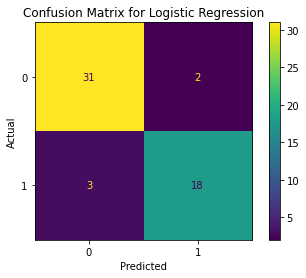

In [21]:
# Logistic Regression

# random_state: Setting a random_state value sets the integer for the random seed which helps to produce the same results
# when the same integer is set, it will produce the same splitting datasets every time when the code is ran.
# Reference: https://kishanmodasiya.medium.com/what-the-heck-is-random-state-24a7a8389f3d
# max_iter: The maximum number of iterations.
# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Initialize the Logistic Regression
logReg = LogisticRegression(random_state=42, max_iter=1000)
# Train the Logistic Regression model using the provided training data
logReg.fit(X_train, y_train)
# Make predictions on the test data
logReg_y_pred = logReg.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, logReg_y_pred), 2)
precision = round(precision_score(y_test, logReg_y_pred), 2)
recall = round(recall_score(y_test, logReg_y_pred), 2)
f1 = round(f1_score(y_test, logReg_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("Logistic Regression")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, logReg_y_pred)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(logReg, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Logistic Regression')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Optimal Parameters for Logistic Regression: {'C': 1, 'max_iter': 10000, 'solver': 'lbfgs'}
Logistic Regression Hyperparameter Tuned
Accuracy: 0.91
Precision: 0.9
Recall: 0.86
F1 Score: 0.88


<Figure size 576x432 with 0 Axes>

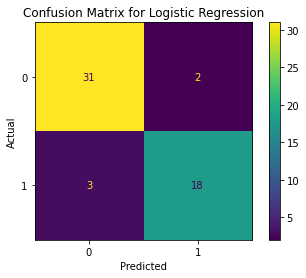

In [22]:
# Logistic Regression Hyperparamter Tuned

# C: Regularisation Strength. Regularisation is a technique used in machine learning to 
# prevent overfitting by adding a penalty to the model's complexity.
# solver: Algorithm to use in the optimisation problem
# verbose=3: Shows the most detailed output. It displays every parameter combination being evaluated, 
# along with detailed information about each step of the process.
# n_jobs=-1: Uses all available cores on the machine for parallel processing.
# refit=True: This parameter means that after finding the best hyperparameters, 
# GridSearchCV will automatically re-train the model using these optimal settings on the entire training dataset.
# When cv= None, then it uses default 5-fold cross-validation.
# The code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for Logistic Regression
parametersLogReg = {
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'max_iter': [10000]
}
# Initialize the Logistic Regression model
logReg = LogisticRegression(random_state=42)
# Find the best hyperparameters using GridSearchCV
logRegGrid = GridSearchCV(logReg, parametersLogReg, refit=True, cv=None, verbose=3, n_jobs=-1)
# Fit the Logistic Regression model on training data
logRegGrid.fit(X_train, y_train)
# Print best parameters found by using GridSearchCV
bestLogReg = logRegGrid.best_params_
print("Optimal Parameters for Logistic Regression:", bestLogReg)

# Train the Logistic Regression model using the optimal hyperparameters found
optLogReg = LogisticRegression(
    C = bestLogReg['C'],
    solver = bestLogReg['solver'],
    max_iter = bestLogReg['max_iter'],
    random_state = 42
)
# Fit the optmised model 
optLogReg.fit(X_train, y_train)
# Make predictions on the test data
logReg_y_pred_ht = optLogReg.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, logReg_y_pred_ht), 2)
precision = round(precision_score(y_test, logReg_y_pred_ht), 2)
recall = round(recall_score(y_test, logReg_y_pred_ht), 2)
f1 = round(f1_score(y_test, logReg_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Logistic Regression Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("Logistic Regression Hyperparameter Tuned")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, logReg_y_pred_ht)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optLogReg, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Logistic Regression')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Decision Tree
Accuracy: 0.69
Precision: 0.58
Recall: 0.71
F1 Score: 0.64


<Figure size 576x432 with 0 Axes>

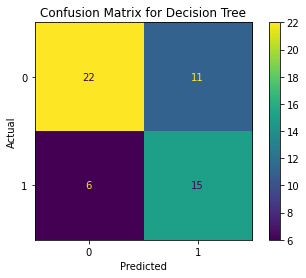

In [23]:
# Decision Tree

# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Initialize the Decision Tree Classifier
dTree = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree model using the provided training data
dTree.fit(X_train, y_train)
# Make predictions on the test data
dTree_y_pred = dTree.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, dTree_y_pred), 2)
precision = round(precision_score(y_test, dTree_y_pred), 2)
recall = round(recall_score(y_test, dTree_y_pred), 2)
f1 = round(f1_score(y_test, dTree_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Decision Tree'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the Accuracy, Precision, Recall, and F1 Score
print("Decision Tree")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, dTree_y_pred)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(dTree, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Decision Tree')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Optimal Parameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Hyperparameter Tuned
Accuracy: 0.74
Precision: 0.67
Recall: 0.67
F1 Score: 0.67


<Figure size 576x432 with 0 Axes>

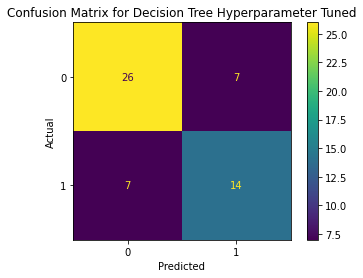

In [24]:
# Decision Tree Hyperparameter Tuned

# criterion: This parameter defines the function to measure the quality of a split.
# max_depth: The maximum depth of the tree.
# max_features: This parameter specifies the number of features to consider when looking for the best split.
# min_samples_split: This parameter specifies the minimum number of samples required to split an internal node.
# min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node.
# max_leaf_nodes: This parameter specifies the maximum number of leaf nodes in the tree.
# class_weight: This parameter is used to assign weights to classes. 
# The code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for Decision Tree
parametersdTree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 4, 5],
    'max_leaf_nodes': [None, 10, 20, 30],
    'class_weight': ['balanced', None]
}

# Initialize the Decision Tree Classifier
dTree = DecisionTreeClassifier(random_state=42)
# Find the best hyperparameters using GridSearchCV
dTreeGrid = GridSearchCV(dTree, parametersdTree, refit=True, cv=None, verbose=3, n_jobs=-1)
# Fit the Decision Tree model on training data
dTreeGrid.fit(X_train, y_train)
# Print best parameters and scores for Decision Tree GridSearchCV
bestDTree = dTreeGrid.best_params_
print("Optimal Parameters for Decision Tree:", bestDTree)

# Train the Decision Tree model using the optimal hyperparameters found
optDTree = DecisionTreeClassifier(
    criterion = bestDTree['criterion'],
    max_depth = bestDTree['max_depth'],
    max_features = bestDTree['max_features'],
    min_samples_split = bestDTree['min_samples_split'],
    min_samples_leaf = bestDTree['min_samples_leaf'],
    max_leaf_nodes = bestDTree['max_leaf_nodes'],
    class_weight = bestDTree['class_weight'],
    random_state = 42
)
# Fit the optmised model
optDTree.fit(X_train, y_train)
# Make predictions on the test data
dTree_y_pred_ht = optDTree.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, dTree_y_pred_ht), 2)
precision = round(precision_score(y_test, dTree_y_pred_ht), 2)
recall = round(recall_score(y_test, dTree_y_pred_ht), 2)
f1 = round(f1_score(y_test, dTree_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Decision Tree Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the Accuracy, Precision, Recall, and F1 Score
print("Decision Tree Hyperparameter Tuned")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, dTree_y_pred_ht)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optDTree, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Decision Tree Hyperparameter Tuned')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Random Forest
Accuracy: 0.76
Precision: 0.72
Recall: 0.62
F1 Score: 0.67


<Figure size 576x432 with 0 Axes>

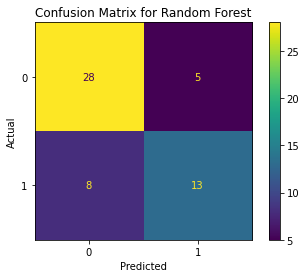

In [25]:
# Random Forest

# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Initialize the Random Forest Classifier
rForest = RandomForestClassifier(random_state=42)
# Train the Random Forest model using the provided training data
rForest.fit(X_train, y_train)
# Make predictions on the test data
rForest_y_pred = rForest.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, rForest_y_pred), 2)
precision = round(precision_score(y_test, rForest_y_pred), 2)
recall = round(recall_score(y_test, rForest_y_pred), 2)
f1 = round(f1_score(y_test, rForest_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Random Forest'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("Random Forest")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, rForest_y_pred)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(rForest, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Random Forest')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Optimal Parameters for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Hyperparameter Tuned
Accuracy: 0.87
Precision: 0.94
Recall: 0.71
F1 Score: 0.81


<Figure size 576x432 with 0 Axes>

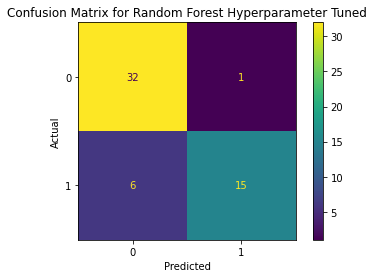

In [26]:
# Random Forest Hyperparameter Tuned

# n_estimtors: This parameter specifies the number of trees in the forest.
# criterion: It specifies the function used to evaluate the quality of a split at each node of the tree.
# bootstrap: This parameter specifies whether bootstrap samples are used when building trees.
# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for Random Forest
parametersRForest = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
# Initialize the Random Forest Classifier
rForest = RandomForestClassifier(random_state=42)
# Find the best hyperparameters using GridSearchCV
rForestGrid = GridSearchCV(rForest, parametersRForest, refit=True, cv=None, verbose=3, n_jobs=-1)
# Fit the Random Forest model on training data
rForestGrid.fit(X_train, y_train)
# Print best parameters found by using GridSearchCV
bestRForest = rForestGrid.best_params_
print("Optimal Parameters for Random Forest:", bestRForest)

# Train the Random Forest model using the optimal hyperparameters found
optRForest = RandomForestClassifier(
    n_estimators = bestRForest['n_estimators'],
    max_depth = bestRForest['max_depth'],
    max_features = bestRForest['max_features'],
    min_samples_split = bestRForest['min_samples_split'],
    min_samples_leaf = bestRForest['min_samples_leaf'],
    criterion = bestRForest['criterion'],
    bootstrap = bestRForest['bootstrap'],
    random_state = 42
)
# Fit the optmised model 
optRForest.fit(X_train, y_train)
# Make predictions on the test data
rForest_y_pred_ht = optRForest.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, rForest_y_pred_ht), 2)
precision = round(precision_score(y_test, rForest_y_pred_ht), 2)
recall = round(recall_score(y_test, rForest_y_pred_ht), 2)
f1 = round(f1_score(y_test, rForest_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['Random Forest Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("Random Forest Hyperparameter Tuned")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, rForest_y_pred_ht)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optRForest, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for Random Forest Hyperparameter Tuned')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Support Vector Machine (SVM)
Accuracy: 0.89
Precision: 0.89
Recall: 0.81
F1 Score: 0.85


<Figure size 576x432 with 0 Axes>

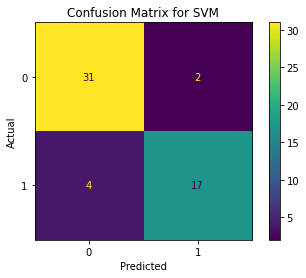

In [27]:
# Support Vector Machine

# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Initialize the Support Vector Classifier
svm = SVC(random_state=42)
# Train the Support Vector Machine model using the provided training data
svm.fit(X_train, y_train)
# Make predictions on the test data
svm_y_pred = svm.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, svm_y_pred), 2)
precision = round(precision_score(y_test, svm_y_pred), 2)
recall = round(recall_score(y_test, svm_y_pred), 2)
f1 = round(f1_score(y_test, svm_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['SVM'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the Accuracy, Precision, Recall, and F1 Score
print("Support Vector Machine (SVM)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, svm_y_pred)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(svm, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for SVM')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimal Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Support Vector Machine (SVM) Hyperparameter Tuned
Accuracy: 0.93
Precision: 1.0
Recall: 0.81
F1 Score: 0.89


<Figure size 576x432 with 0 Axes>

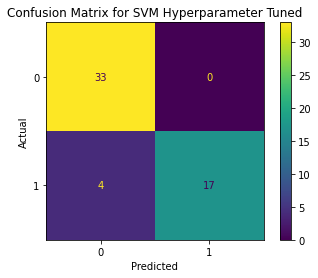

In [28]:
# Support Vector Machine Hyperparameter Tuned

# kernel: Specifies the kernel type to be used in the algorithm.
# gamma: Kernel coefficient.
# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for SVM
parametersSVM = {
    'C': [0.1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
# Initialize the SVM model
svm = SVC(random_state=42)
# Find the best hyperparameters using GridSearchCV
svmGrid = GridSearchCV(svm, parametersSVM, refit=True, cv=None, verbose=3, n_jobs=-1)
# Fit the SVM model on training data
svmGrid.fit(X_train, y_train)
# Print best parameters found by using GridSearchCV
bestSVM = svmGrid.best_params_
print("Optimal Parameters for SVM:", bestSVM)

# Train the SVM model using the optimal hyperparameters found
optSVM = SVC(
    C = bestSVM['C'],
    kernel = bestSVM['kernel'],
    gamma = bestSVM['gamma'],
    random_state = 42
)
# Fit the optmised model
optSVM.fit(X_train, y_train)
# Make predictions on the test data
svm_y_pred_ht = optSVM.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, svm_y_pred_ht), 2)
precision = round(precision_score(y_test, svm_y_pred_ht), 2)
recall = round(recall_score(y_test, svm_y_pred_ht), 2)
f1 = round(f1_score(y_test, svm_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['SVM Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("Support Vector Machine (SVM) Hyperparameter Tuned")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, svm_y_pred_ht)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optSVM, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for SVM Hyperparameter Tuned')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

K-Nearest Neighbors (KNN)
Accuracy: 0.81
Precision: 0.82
Recall: 0.67
F1 Score: 0.74


<Figure size 576x432 with 0 Axes>

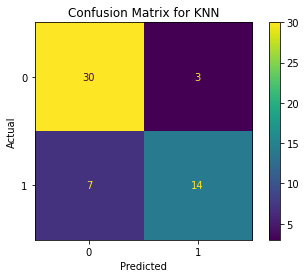

In [29]:
# K-Nearest Neighbours

# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Initialize the K Neighbors Classifier
knn = KNeighborsClassifier()
# Train the KNN model using the provided training data
knn.fit(X_train, y_train)
# Make predictions on the test data
knn_y_pred = knn.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, knn_y_pred), 2)
precision = round(precision_score(y_test, knn_y_pred), 2)
recall = round(recall_score(y_test, knn_y_pred), 2)
f1 = round(f1_score(y_test, knn_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['KNN'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, knn_y_pred)
# Set the figure size
plt.figure(figsize=(8, 6))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(knn, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for KNN')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Optimal Parameters for KNN: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
K-Nearest Neighbors (KNN) HHyperparameter TunedT
Accuracy: 0.87
Precision: 0.85
Recall: 0.81
F1 Score: 0.83


<Figure size 720x576 with 0 Axes>

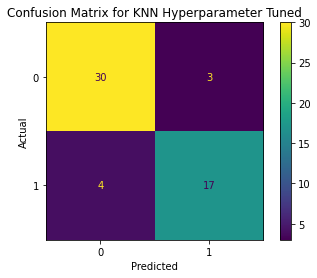

In [30]:
#KNN Hyperparameter Tuned

# weights: Determines how much influence each of the nearest neighbors has when making predictions.
# p=1: Manhattan Distance, p=2: Euclidean Distance
# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for KNN
parametersKNN = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Initialize the K Neighbors Classifier
knn = KNeighborsClassifier()
# Find the best hyperparameters using GridSearchCV
knnGrid = GridSearchCV(knn, parametersKNN, refit=True, cv=None, verbose=3, n_jobs=-1)
# Fit the KNN model on training data
knnGrid.fit(X_train, y_train)
# Print best parameters found by using GridSearchCV
bestKNN = knnGrid.best_params_
print("Optimal Parameters for KNN:", bestKNN)

# Train the KNN model using the optimal hyperparameters found
optKNN = KNeighborsClassifier(
    n_neighbors=bestKNN['n_neighbors'],
    weights=bestKNN['weights'],
    p=bestKNN['p']
)
# Fit the optmised model 
optKNN.fit(X_train, y_train)
# Make predictions on the test data
knn_y_pred_ht = optKNN.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, knn_y_pred_ht), 2)
precision = round(precision_score(y_test, knn_y_pred_ht), 2)
recall = round(recall_score(y_test, knn_y_pred_ht), 2)
f1 = round(f1_score(y_test, knn_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['KNN Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("K-Nearest Neighbors (KNN) HHyperparameter TunedT")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, knn_y_pred_ht)
# Set the figure size
plt.figure(figsize=(10, 8))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optKNN, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for KNN Hyperparameter Tuned')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

AdaBoost
Accuracy: 0.89
Precision: 0.94
Recall: 0.76
F1 Score: 0.84


<Figure size 720x576 with 0 Axes>

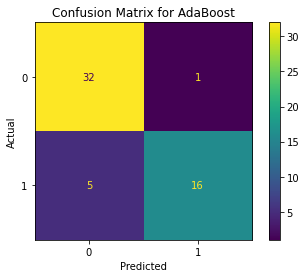

In [31]:
# AdaBoost

# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# Initialize the AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=42)
# Train the AdaBoost model using the provided training data
adaboost.fit(X_train, y_train)
# Make predictions on the test data
adab_y_pred = adaboost.predict(X_test)

accuracy = round(accuracy_score(y_test, adab_y_pred), 2)
precision = round(precision_score(y_test, adab_y_pred), 2)
recall = round(recall_score(y_test, adab_y_pred), 2)
f1 = round(f1_score(y_test, adab_y_pred), 2)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, adab_y_pred), 2)
precision = round(precision_score(y_test, adab_y_pred), 2)
recall = round(recall_score(y_test, adab_y_pred), 2)
f1 = round(f1_score(y_test, adab_y_pred), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['AdaBoost'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Print the performance metrics
print("AdaBoost")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, adab_y_pred)
# Set the figure size
plt.figure(figsize=(10, 8))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(adaboost, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for AdaBoost')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Optimal Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
AdaBoost Hyperparameter Tuned
Accuracy: 0.89
Precision: 1.0
Recall: 0.71
F1 Score: 0.83


<Figure size 720x576 with 0 Axes>

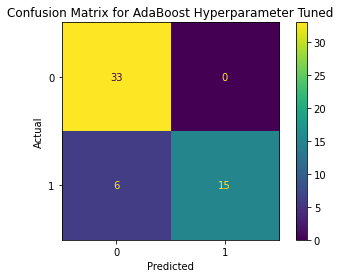

In [32]:
# AdaBoost Hyperparameter Tuned

# learning_rate: Weight applied to each classifier at each boosting iteration.
# This code has been referred from
# https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define the parameter grid for AdaBoost
parametersAdaBoost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1, 10]
}
# Initialize the AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=42)
# Find the best hyperparameters using GridSearchCV
adaBoostGrid = GridSearchCV(adaboost, parametersAdaBoost, scoring = 'f1', cv=None, verbose=3, n_jobs=-1)
# Fit the AdaBoost model on training data
adaBoostGrid.fit(X_train, y_train)
# Print best parameters found by using GridSearchCV
bestAdaBoost = adaBoostGrid.best_params_
print("Optimal Parameters for AdaBoost:", bestAdaBoost)

# Train the AdaBoost model using the optimal hyperparameters found
optAdaBoost = AdaBoostClassifier(
    n_estimators = bestAdaBoost['n_estimators'],
    learning_rate = bestAdaBoost['learning_rate'],
    random_state = 42
)
# Fit the optmised model 
optAdaBoost.fit(X_train, y_train)
# Make predictions on the test data
adab_y_pred_ht = optAdaBoost.predict(X_test)

# Calculate the performance metrics
accuracy = round(accuracy_score(y_test, adab_y_pred_ht), 2)
precision = round(precision_score(y_test, adab_y_pred_ht), 2)
recall = round(recall_score(y_test, adab_y_pred_ht), 2)
f1 = round(f1_score(y_test, adab_y_pred_ht), 2)

# Store the performance metrics of the model in the 'score' dictionary
score['AdaBoost Hyperparameter Tuned'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
# Print the performance metrics
print("AdaBoost Hyperparameter Tuned")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the Confusion Matrix to understand the performance of the model
cm = confusion_matrix(y_test, adab_y_pred_ht)
# Set the figure size
plt.figure(figsize=(10, 8))
# Use scikit-learn's built-in function to plot the confusion matrix
plot_confusion_matrix(optAdaBoost, X_test, y_test, values_format='d')
# Title of the plot
plt.title('Confusion Matrix for AdaBoost Hyperparameter Tuned')
# Labels for X-axis and Y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Display the plot
plt.show()

In [33]:
# Result Interpretation

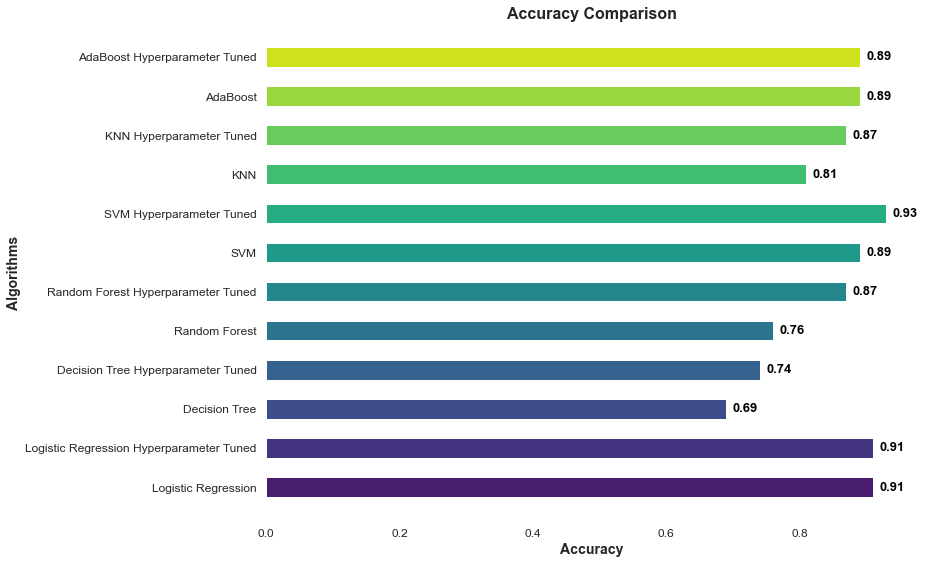

In [34]:
# Comparing accuracies of the Supervised Learning Algorithms for the given dataset.

# This code has been referred from
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://seaborn.pydata.org/examples/part_whole_bars.html#
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://www.tutorialspoint.com/how-to-annotate-bars-in-bar-plot-with-matplotlib-in-python
# Specify the visual style for the plot
sns.set(style="white")
# Set the plot size
plt.figure(figsize=(13, 8))
# Prepare the data to be plotted
algorithms = list(score.keys())
accuracies = [score[name]['Accuracy'] for name in algorithms]
# Specify a colour scheme for the bars
palette = sns.color_palette("viridis", len(algorithms))
# Using a horizontal bar graph
bars = plt.barh(algorithms, accuracies, color=palette, height=0.5)
# Indicate accuracy values besides the bars.
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', 
             fontsize=13, color='black', font='Arial', fontweight='bold')
# Set the labels for X-axis and Y-axis
plt.xlabel('Accuracy', font='Arial', fontsize=14, fontweight='bold')
plt.ylabel('Algorithms', font='Arial', fontsize=14, fontweight='bold')
# Title of the graph
plt.title('Accuracy Comparison', font='Arial', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Cleaner look without borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Compact arrangement
plt.tight_layout()
# Display the plot
plt.show()

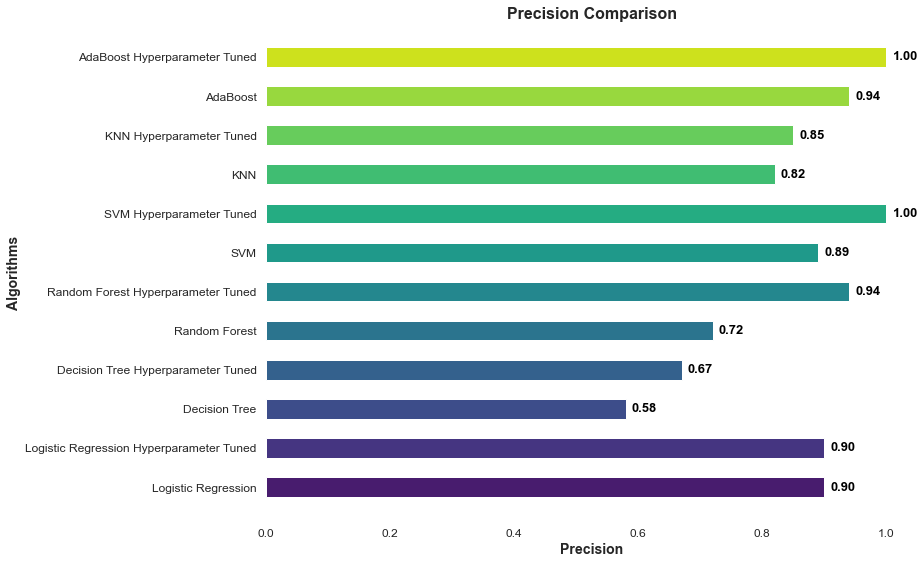

In [35]:
# Compare Precision of all algorithms

# This code has been referred from
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://seaborn.pydata.org/examples/part_whole_bars.html#
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://www.tutorialspoint.com/how-to-annotate-bars-in-bar-plot-with-matplotlib-in-python
# Specify the visual style for the plot
sns.set(style="white")
# Set the plot size
plt.figure(figsize=(13, 8))
# Prepare the data to be plotted
algorithms = list(score.keys())
precision = [score[name]['Precision'] for name in algorithms]
# Specify a colour scheme for the bars
palette = sns.color_palette("viridis", len(algorithms))
# Using a horizontal bar graph
bars = plt.barh(algorithms, precision, color=palette, height=0.5)
# Indicate precision values besides the bars.
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', 
             fontsize=13, color='black', font='Arial', fontweight='bold')
# Set the labels for X-axis and Y-axis
plt.xlabel('Precision', font='Arial', fontsize=14, fontweight='bold')
plt.ylabel('Algorithms', font='Arial', fontsize=14, fontweight='bold')
# Title of the graph
plt.title('Precision Comparison', font='Arial', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Cleaner look without borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Compact arrangement
plt.tight_layout()
# Display the plot
plt.show()

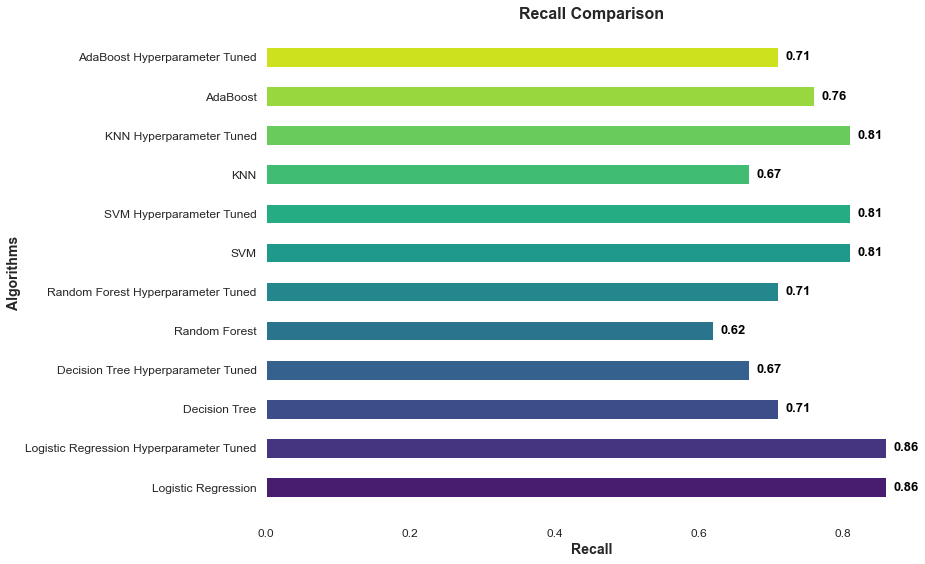

In [36]:
# Comparing Recall of all algorithms

# This code has been referred from
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://seaborn.pydata.org/examples/part_whole_bars.html#
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://www.tutorialspoint.com/how-to-annotate-bars-in-bar-plot-with-matplotlib-in-python
# Specify the visual style for the plot
sns.set(style="white")
# Set the plot size
plt.figure(figsize=(13, 8))
# Prepare the data to be plotted
algorithms = list(score.keys())
recall = [score[name]['Recall'] for name in algorithms]
# Specify a colour scheme for the bars
palette = sns.color_palette("viridis", len(algorithms))
# Using a horizontal bar graph
bars = plt.barh(algorithms, recall, color=palette, height=0.5)
# Indicate recall values besides the bars.
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', 
             fontsize=13, color='black', font='Arial', fontweight='bold')
# Set the labels for X-axis and Y-axis
plt.xlabel('Recall', font='Arial', fontsize=14, fontweight='bold')
plt.ylabel('Algorithms', font='Arial', fontsize=14, fontweight='bold')
# Title of the graph
plt.title('Recall Comparison', font='Arial', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Cleaner look without borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Compact arrangement
plt.tight_layout()
# Display the plot
plt.show()

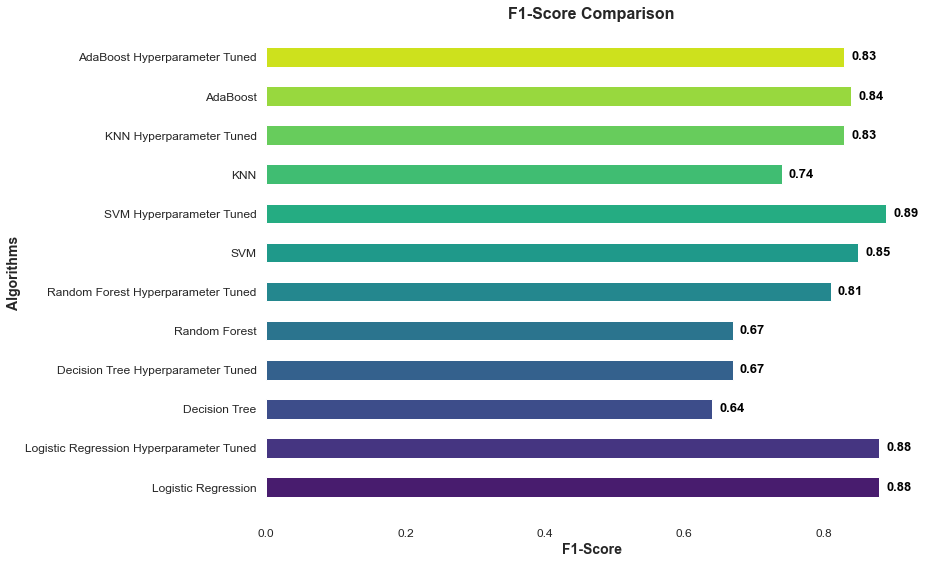

In [37]:
# Comparing F1-Score of all algorithms

# This code has been referred from
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://seaborn.pydata.org/examples/part_whole_bars.html#
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://www.tutorialspoint.com/how-to-annotate-bars-in-bar-plot-with-matplotlib-in-python
# Specify the visual style for the plot
sns.set(style="white")
# Set the plot size
plt.figure(figsize=(13, 8))
# Prepare the data to be plotted
algorithms = list(score.keys())
f1 = [score[name]['F1 Score'] for name in algorithms]
# Specify a colour scheme for the bars
palette = sns.color_palette("viridis", len(algorithms))
# Using a horizontal bar graph
bars = plt.barh(algorithms, f1, color=palette, height=0.5)
# Indicate f1-score values besides the bars.
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', 
             fontsize=13, color='black', font='Arial', fontweight='bold')
# Set the labels for X-axis and Y-axis
plt.xlabel('F1-Score', font='Arial', fontsize=14, fontweight='bold')
plt.ylabel('Algorithms', font='Arial', fontsize=14, fontweight='bold')
# Title of the graph
plt.title('F1-Score Comparison', font='Arial', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Cleaner look without borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Compact arrangement
plt.tight_layout()
# Display the plot
plt.show()

In [38]:
# print(score)